### 1. K-NN 알고리즘 (K Neighbor Nearest, K-최근접 이웃 알고리즘)
* 데이터로부터 거리가 가까운 K개의 다른 데이터 레이블을 참조하여 분류하는 알고리즘
* 비슷한 특성을 가진 데이터는 비슷한 범주에 속하는 경향이 있다는 가정
* K-NN은 간단한 알고리즘이지만, 이미지 처리, 영상에서 글자인식과 얼굴인식,

  영화나 음악, 상품 추천에 대한 개인별 선호 예측, 의료, 유전자 데이터의 패턴 인식 등 많은 분야에서 사용
* 거리를 측정할 땐 유클리드 거리(Euclidean distance)를 사용
<center><img src='https://velog.velcdn.com/images%2Fhyesoup%2Fpost%2F6c43bb2f-2ec1-47bb-9923-625abc5f2406%2Fimage.png' width=600></center>
* 계산 공식
<center><img src='https://velog.velcdn.com/images%2Fhyesoup%2Fpost%2F63b8d471-32c3-46ca-86a6-f43285c30d51%2Fimage.png' width=600></center>




* 주변의 가장 가까운 K개의 데이터를 보고 데이터가 속할 그룹을 판단하는 알고리즘
<center><img src='https://blog.kakaocdn.net/dn/Tw9Qc/btrhfglIY5t/eXKS1iyJnI4AvVofvODKW1/img.png' width=600></center>

* K-NN 알고리즘의 특징 중 하나는 K의 값에 따라 분류가 달라질 수 있다.
<center><img src='https://blog.kakaocdn.net/dn/LDQRC/btrhfxVs54I/rVkQlscpQlMsXLlgG55Qk0/img.png' width=600></center>

* 훈련 속도가 빠르지만, 거리를 계산하므로 데이터셋이 클 경우 시간이 오래 걸림


### 2. 실습 (basketball_stat.csv)
* 데이터 구조
    * 데이터: 농구선수 스탯 정보
    * 관측치 개수: 100개
    * 변수: 8개
* 변수설명
    * Player = 선수 이름
    * Pos = 포지션
    * 3P = 한 경기 평균 3점슛 성공 횟수
    * 2P = 한 경기 평균 2점슛 성공 횟수
    * TRB = 한 경기 평균 리바운드 성공 횟수
    * AST = 한 경기 평균 어시스트 성공 횟수
    * STL = 한 경기 평균 스틸 성공 횟수
    * BLK = 한 경기 평균 블로킹 성공 횟수
* 목표
    * 경기 스탯을 통해 농구선수의 포지션 예측

In [15]:
# 데이터 확인
import pandas as pd
df = pd.read_csv('basketball_stat.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [16]:
# 결측값 확인
df.isna().sum()

Player    0
Pos       0
3P        0
2P        0
TRB       0
AST       0
STL       0
BLK       0
dtype: int64

In [17]:
df.describe()

,3P,2P,TRB,AST,STL,BLK
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,1.08200,3.265000,5.030000,1.892000,0.725000,0.69600
std,0.91424,1.843053,3.098599,1.257357,0.343004,0.59661
min,0.00000,0.500000,1.300000,0.200000,0.000000,0.10000
25%,0.00000,1.900000,2.875000,0.975000,0.500000,0.20000
50%,1.30000,2.900000,3.900000,1.500000,0.700000,0.55000
75%,1.80000,4.450000,6.325000,2.600000,0.925000,1.00000
max,3.40000,9.700000,14.100000,5.900000,1.600000,3.00000


Text(0.5, 1.0, '어시스트와 2점슛 관계')

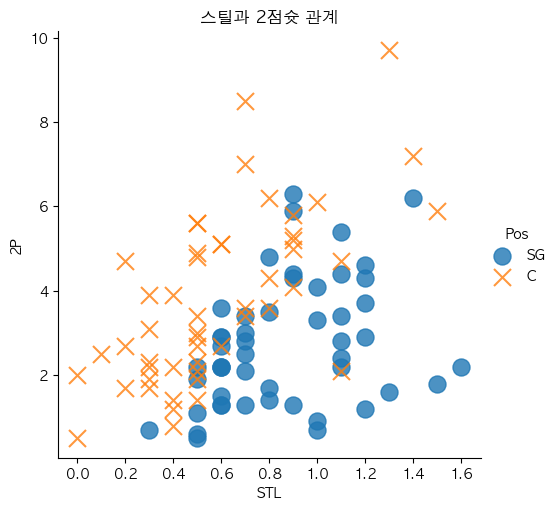

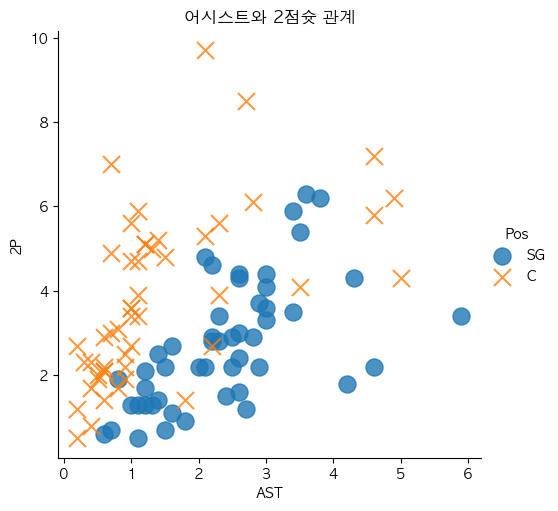

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'

#스틸, 2점슛 데이터 시각화
sns.lmplot(x='STL', y='2P', data=df, fit_reg=False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점 크기
           markers=["o", "x"], # 모양 지정
           hue="Pos") # 예측값

#타이틀
plt.title('스틸과 2점슛 관계')

#어시스트, 2점슛 데이터 시각화
sns.lmplot(x='AST', y='2P', data = df, fit_reg = False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점 크기
           markers=["o", "x"], #모양 지정
           hue="Pos") #예측값

#타이틀
plt.title('어시스트와 2점슛 관계')

Text(0.5, 1.0, '리바운드와 3점슛 관계')

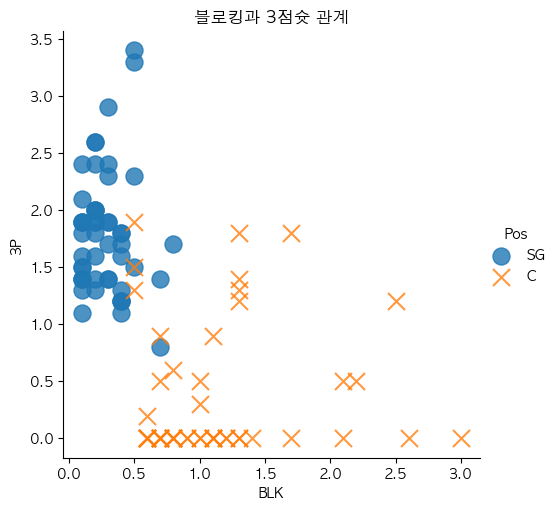

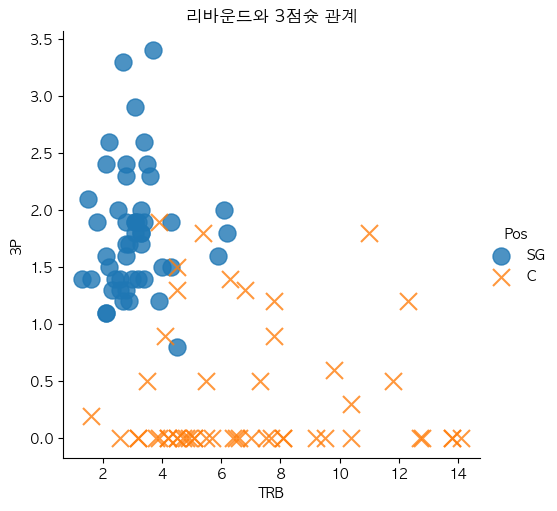

In [19]:
#블로킹, 3점슛 데이터 시각화
sns.lmplot(x='BLK', y='3P', data = df, fit_reg = False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점 크기
           markers=["o", "x"], #모양 지정
           hue="Pos") #예측값

#타이틀
plt.title('블로킹과 3점슛 관계')

#리바운드, 3점슛 데이터 시각화
sns.lmplot(x='TRB', y='3P', data = df, fit_reg = False, # x축, y축, 데이터, 노 라인
           scatter_kws={"s":150}, # 좌표 상의 점 크기
           markers=["o", "x"], #모양 지정
           hue="Pos") #예측값

#타이틀
plt.title('리바운드와 3점슛 관계')

In [20]:
#2점슛, 어시스트, 스틸 삭제
df.drop(['Player','2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Pos,3P,TRB,BLK
0,SG,1.4,1.3,0.1
1,C,0.0,7.7,1.0
2,C,0.0,4.5,0.6
3,C,0.0,2.6,0.6
4,SG,1.5,4.3,0.5


In [29]:
df['Pos'].value_counts()

Pos
SG    50
C     50
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

# 80%는 학습 데이터, 20%는 테스트 데이터로 분리
train, test = train_test_split(df, test_size=0.2)

# 학습 데이터, 테스트 데이터 개수 확인
print(train.shape)
print(test.shape)

(80, 4)
(20, 4)


In [27]:
train

,Pos,3P,TRB,BLK
94,SG,1.3,2.6,0.1
59,SG,1.4,3.4,0.3
1,C,0.0,7.7,1.0
52,C,0.6,9.8,0.8
40,C,0.0,3.8,0.7
...,...,...,...,...
3,C,0.0,2.6,0.6
9,C,0.0,7.0,1.1
37,C,0.9,4.1,0.7
62,C,0.0,6.4,1.4


In [28]:
test

,Pos,3P,TRB,BLK
76,SG,2.6,2.2,0.2
39,SG,1.9,2.8,0.2
88,SG,1.3,2.8,0.4
0,SG,1.4,1.3,0.1
81,SG,1.2,3.9,0.4
43,C,0.0,5.1,1.3
50,C,1.3,6.8,1.3
99,SG,2.0,2.5,0.2
18,C,1.8,11.0,1.3
78,SG,1.4,3.2,0.7


In [22]:
#kNN 라이브러리 import
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score # k-fold 교차검증

#최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2): #홀수
  k_list.append(i)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
cross_validation_scores = [] # 각 k의 검증 결과 점수들
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                           scoring='accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

# 10-fold 교차 검증의 과정
# 데이터 분할: 데이터셋을 10개의 같은 크기의 폴드로 나눕니다.
# 반복 학습과 검증:
# 첫 번째 반복에서는 첫 번째 폴드를 검증 세트로 사용하고, 나머지 9개의 폴드를 훈련 세트로 사용하여 모델을 학습하고 검증합니다.
# 두 번째 반복에서는 두 번째 폴드를 검증 세트로 사용하고, 나머지 9개의 폴드를 훈련 세트로 사용하여 모델을 학습하고 검증합니다.
# 이 과정을 10번 반복합니다.
# 평균 성능 계산: 각 반복에서의 검증 결과(여기서는 정확도)를 평균하여 최종 성능을 평가합니다.

[0.925,
 0.9,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9125,
 0.875,
 0.875,
 0.875,
 0.85,
 0.8625,
 0.85,
 0.8375,
 0.8375]

In [23]:
#가장 예측율이 높은 k를 선정
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k : " + str(k))

The best number of k : 3


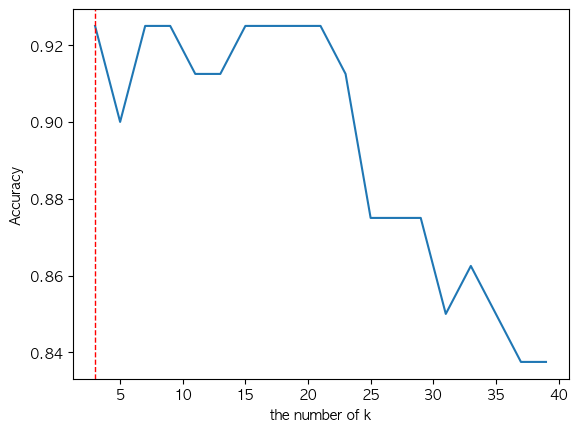

In [24]:
#k에 따른 정확도 시각화
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.axvline(k, color='r', linestyle='--', linewidth=1)
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#knn 모델 학습
knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

#테스트 시작
pred = knn.predict(x_test)

#모델 예측 정확도(accuracy) 출력
print("accuracy : " + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.9


In [26]:
#실제값과 예측값 비교
comparison = pd.DataFrame({'prediction': pred, 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,SG,SG
2,SG,SG
3,SG,SG
4,SG,SG
5,C,C
6,C,C
7,SG,SG
8,C,C
9,SG,SG
